# Dummy모델

* 최빈값을 예측값으로 하는 DummyClassifier

In [1]:
from ml1.preamble import*
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)

print('예측된 레이블의 레이블:', np.unique(pred_most_frequent))
print(f'테스트 점수: {dummy_majority.score(X_test, y_test):.2f}')

예측된 레이블의 레이블: [False]
테스트 점수: 0.90


* 훈련세트의 비율대로 예측을 하는 DummyClassifier

In [2]:
dummy = DummyClassifier(strategy='stratified').fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("테스트 점수: {:.2f}".format(dummy.score(X_test, y_test)))

테스트 점수: 0.83


* 트리 모델

In [3]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print(f'테스트 점수: {tree.score(X_test, y_test):.2f}')

테스트 점수: 0.92


* 선형 모델

In [4]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=.1, max_iter=1000).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print(f'테스트 점수: {logreg.score(X_test, y_test):.2f}')

테스트 점수: 0.98


=> Dummy모델보다 얼마나 더 나은지 알려주는 평가 지표가 필요

# Confusion Matrix

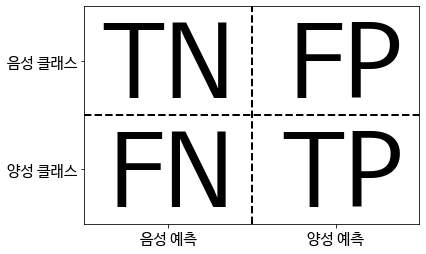

In [5]:
mglearn.plots.plot_binary_confusion_matrix()

In [6]:
from sklearn.metrics import confusion_matrix

for model, prediction in zip(['빈도 기반 더미', '무작위 더미', '트리', '선형'],
                             [pred_most_frequent, pred_dummy, pred_tree, pred_logreg]):
    confusion = confusion_matrix(y_test, prediction)
    print(model,'모델 오차 행렬:\n', confusion)
    print()

빈도 기반 더미 모델 오차 행렬:
 [[403   0]
 [ 47   0]]

무작위 더미 모델 오차 행렬:
 [[364  39]
 [ 43   4]]

트리 모델 오차 행렬:
 [[390  13]
 [ 24  23]]

선형 모델 오차 행렬:
 [[402   1]
 [  6  41]]



* 히트맵으로 표시

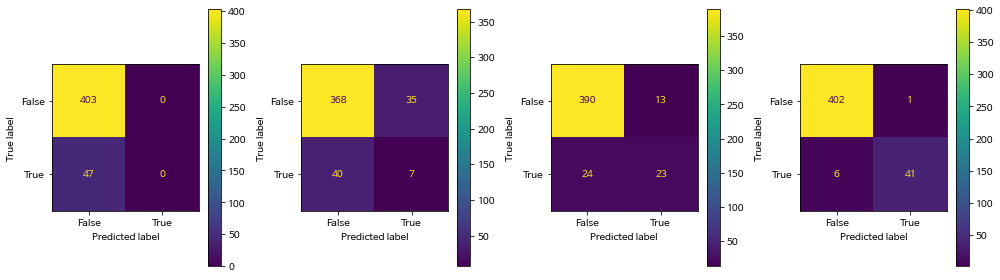

In [7]:
from sklearn.metrics import plot_confusion_matrix
fig, axes = plt.subplots(1, 4, figsize=(14,4))
for ax, model in zip(axes, [dummy_majority, dummy, tree, logreg]):
    plot_confusion_matrix(model, X_test, y_test, ax= ax)
fig.tight_layout()
plt.show()

# 평가 지표

## 정확도

* accuracy = (TP+TN)/(TP+TN + FP+FN)

## 정밀도

* precision = TP/(TP+FP)
* 거짓 양성의 수를 줄이는 것이 목표일 때

## 재현율

* recall = TP/(TP+FN)
* 모든 양성 샘플을 식별해야 할 때, 즉 FN을 피하는 것이 중요할 때

## f1-score

* F = 2\*precision\*recall/(precision+recall)
* 정확도와 정밀도의 조화평균

In [8]:
from sklearn.metrics import f1_score
for model, prediction in zip(['빈도 기반 더미', '무작위 더미', '트리', '선형'],
                             [pred_most_frequent, pred_dummy, pred_tree, pred_logreg]):
    f1 = f1_score(y_test, prediction)
    print(model,'모델의 f1-score:', round(f1,2))

빈도 기반 더미 모델의 f1-score: 0.0
무작위 더미 모델의 f1-score: 0.09
트리 모델의 f1-score: 0.55
선형 모델의 f1-score: 0.92


## classification_report

* 각 클래스가 양성일때의 정밀도 , 재현율, f1-점수를 보여줌
* support는 클래스에 있는 진짜 샘플의 수

In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent, target_names=['9아님', '9']))

              precision    recall  f1-score   support

         9아님       0.90      1.00      0.94       403
           9       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 불확실성 임계값 조정

* 임계값을 조절해서 재현율 혹은 정밀도를 조정할 수 있음

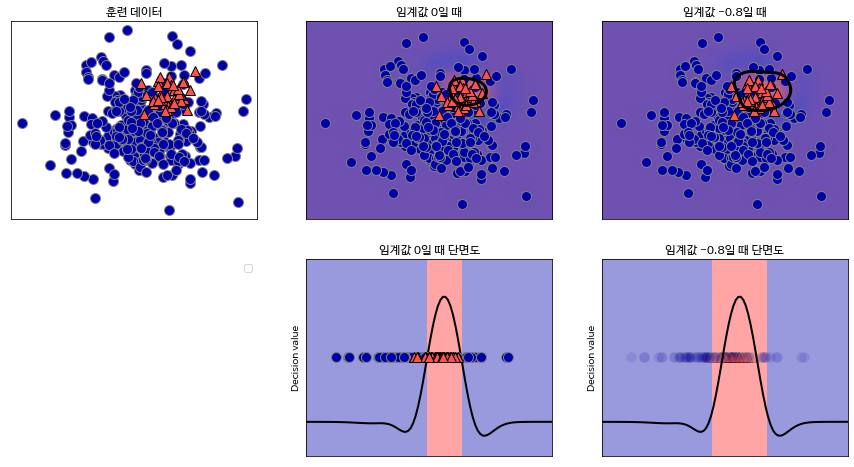

In [10]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
X, y = make_blobs(n_samples=(400,50), cluster_std=[7,2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)

mglearn.plots.plot_decision_threshold()

* decision_funcion의 임계값이 0(default)일때

In [11]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



* decision_funcion의 임계값이 -0.8 일때

In [12]:
y_pred_lower_threshold = svc.decision_function(X_test) > -0.8
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



=> 재현율이 높아지고 정밀도는 낮아짐

# 정밀도-재현률 곡선

* threshold에 따른 정밀도, 재현률의 변화를 보여줌

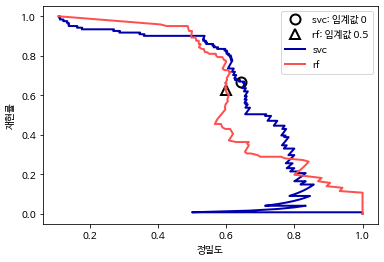

In [13]:
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier

X, y = make_blobs(n_samples=(4000,500), cluster_std=[7,2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)
rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2).fit(X_train, y_train)

precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:,1])

# 임계값이 0인 지점
zero = np.argmin(np.abs(thresholds))
plt.plot(precision[zero], recall[zero], 'o', ms=10, 
         label = 'svc: 임계값 0', fillstyle='none', c='k', mew=2)

zero_rf = np.argmin(np.abs(thresholds_rf-0.5))
plt.plot(precision_rf[zero_rf], recall_rf[zero_rf], '^', ms=10, 
         label = 'rf: 임계값 0.5', fillstyle='none', c='k', mew=2)

plt.plot(precision, recall, label='svc')
plt.plot(precision_rf, recall_rf, label='rf')

plt.xlabel('정밀도')
plt.ylabel('재현률')
plt.legend(loc='best')
plt.show()

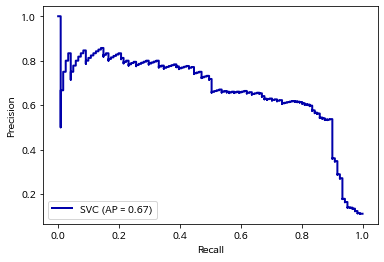

In [14]:
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(svc, X_test, y_test)
plt.show()

* f1-score은 곡선위 한지점에 대한 점수임

In [15]:
print('rf의 f1점수:', round(f1_score(y_test, rf.predict(X_test)),3))
print('svc의 f1점수:', round(f1_score(y_test, svc.predict(X_test)),3))

rf의 f1점수: 0.61
svc의 f1점수: 0.656


* 전체 곡선에 대한 점수 중 하나로 average_precision_score가 있음
* 말 그대로 평균 정밀도를 계산 (정밀도-재현율 곡선의 면적과 비슷)

In [16]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:,1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print(f'rf의 평균 정밀도: {ap_rf:.3f}')
print(f'svc의 평균 정밀도: {ap_svc:.3f}')

rf의 평균 정밀도: 0.660
svc의 평균 정밀도: 0.666


# ROC와 AUC

## ROC 곡선

* 모든 임계값에 대한 진짜 양성 비율(TPR, 재현율)과 거짓 양성 비율(FPR)의 그래프
* 왼쪽 위에 가까울수록 이상적

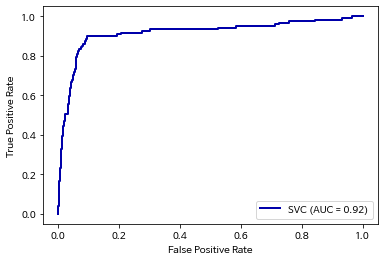

In [17]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(svc, X_test, y_test)
plt.show()

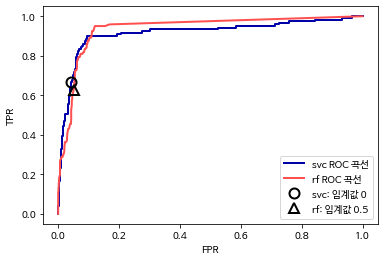

In [18]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label='svc ROC 곡선')
plt.plot(fpr_rf, tpr_rf, label='rf ROC 곡선')

zero = np.argmin(np.abs(thresholds))
zero_rf = np.argmin(np.abs(thresholds_rf-0.5))
plt.plot(fpr[zero], tpr[zero], 'o', ms=10, label='svc: 임계값 0', fillstyle='none', c='k', mew=2)
plt.plot(fpr_rf[zero_rf], tpr_rf[zero_rf], '^', ms=10, label='rf: 임계값 0.5', fillstyle='none', c='k', mew=2)

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=4)

## AUC

* AUC는 이 곡선의 면적

In [19]:
from sklearn.metrics import roc_auc_score

rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))

print(f'rf의 AUC 점수: {rf_auc:.3f}')
print(f'svc의 AUC 점수: {svc_auc:.3f}')

rf의 AUC 점수: 0.937
svc의 AUC 점수: 0.916


* 무작위로 예측하는 경우 AUC 는 0.5 

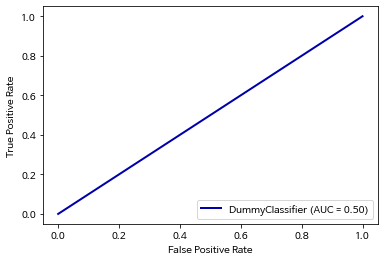

In [20]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(DummyClassifier(strategy='most_frequent').fit(X_train,y_train), X_test, y_test)
plt.show()

=> 불균형한 데이터셋에서는 정확도보다 AUC가 훨씬 좋은 지표임

* digit 데이터에서의 예시

gamma = 1  accuracy = 0.90  auc = 0.50
gamma = 0.1  accuracy = 0.90  auc = 0.96
gamma = 0.01  accuracy = 0.90  auc = 1.00


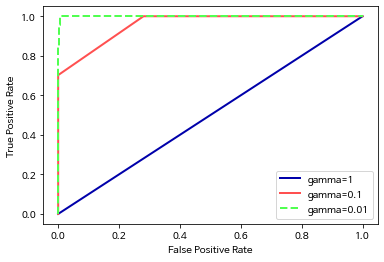

In [21]:
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

for gamma in [1, 0.1, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    print(f'gamma = {gamma}  accuracy = {accuracy:.2f}  auc = {auc:.2f}')
    plot_roc_curve(svc, X_test, y_test, ax = plt.gca())
plt.legend(['gamma=1','gamma=0.1','gamma=0.01'])

=> 3가지 gamma값에 대해서 accuracy는 모두 같지만 auc는 확연히 차이가 남

# 다중 분류

In [22]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)
lr = LogisticRegression(solver='liblinear', multi_class='ovr').fit(X_train, y_train)
pred = lr.predict(X_test)
print(f'정확도: {accuracy_score(y_test, pred):.3f}')
print('오차 행렬\n', confusion_matrix(y_test, pred))

정확도: 0.953
오차 행렬
 [[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


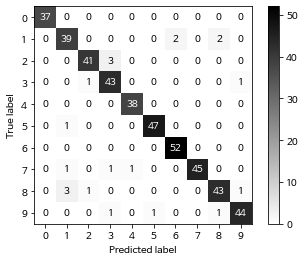

In [23]:
plot_confusion_matrix(lr, X_test, y_test, cmap='binary')

In [24]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.91      0.90        43
           2       0.95      0.93      0.94        44
           3       0.90      0.96      0.92        45
           4       0.97      1.00      0.99        38
           5       0.98      0.98      0.98        48
           6       0.96      1.00      0.98        52
           7       1.00      0.94      0.97        48
           8       0.93      0.90      0.91        48
           9       0.96      0.94      0.95        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



* 각 샘플을 동일하게 간주하고 싶을땐 micro
* 각 클래스를 동일한 비중으로 고려한다면 macro

In [25]:
print(f'micro 평균 f1 점수: {f1_score(y_test, pred, average="micro"):.3f}')
print(f'macro 평균 f1 점수: {f1_score(y_test, pred, average="macro"):.3f}')

micro 평균 f1 점수: 0.953
macro 평균 f1 점수: 0.954


# 회귀

* 보통은 R^2으로 충분

# 모델 선택에서 평가 지표 설정

## 사용 가능한 평가 지표들

In [26]:
from sklearn.metrics import SCORERS
print(SCORERS.keys())

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])


## cross_val_score에서의 평가 지표 설정

In [27]:
from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV

explicit_accuracy = cross_val_score(SVC(), digits.data, digits.target==9, scoring='accuracy', cv=5)
roc_auc = cross_val_score(SVC(), digits.data, digits.target==9, scoring='roc_auc', cv=5)

print('정확도 지표:', explicit_accuracy)
print('평균 정밀도 지표:', roc_auc)

정확도 지표: [0.975 0.992 1.    0.994 0.981]
평균 정밀도 지표: [0.997 0.999 1.    1.    0.984]


* cross_validate를 쓰면 한번에 여러 지표 사용 가능

In [28]:
res = cross_validate(SVC(), digits.data, digits.target==9, scoring=['accuracy', 'roc_auc', 'recall_macro'],
                     return_train_score=True, cv=5)
display(pd.DataFrame(res))

,fit_time,score_time,test_accuracy,train_accuracy,test_roc_auc,train_roc_auc,test_recall_macro,train_recall_macro
0,0.03,0.01,0.97,0.99,1.00,1.0,0.89,0.97
1,0.02,0.01,0.99,1.00,1.00,1.0,0.96,0.98
2,0.03,0.01,1.00,1.00,1.00,1.0,1.00,0.98
3,0.02,0.01,0.99,1.00,1.00,1.0,0.97,0.98
4,0.02,0.01,0.98,1.00,0.98,1.0,0.90,0.99


## GridSearchCV에서의 평가 지표 설정

In [29]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target ==9, random_state=0)

param_grid = {'gamma':[0.0001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(SVC(), param_grid=param_grid, cv=3)
grid.fit(X_train, y_train)

print('<정확도 지표를 사용한 그리드 서치>')
print('최적의 파라미터', grid.best_params_)
print('최상의 교차 검증 점수(정확도)', round(grid.best_score_,3))
print(f'테스트 세트 평균 정밀도: {average_precision_score(y_test, grid.decision_function(X_test)):.3f}')
print(f'테스트 세트 정확도: {grid.score(X_test, y_test):.3f}')

<정확도 지표를 사용한 그리드 서치>
최적의 파라미터 {'gamma': 0.0001}
최상의 교차 검증 점수(정확도) 0.972
테스트 세트 평균 정밀도: 0.966
테스트 세트 정확도: 0.973


In [30]:
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring='average_precision', cv=3)
grid.fit(X_train, y_train)

print('<평균 정밀도 지표를 사용한 그리드 서치>')
print('최적의 파라미터', grid.best_params_)
print('최상의 교차 검증 점수(평균 정밀도)', round(grid.best_score_,3))
print(f'테스트 세트 평균 정밀도: {average_precision_score(y_test, grid.decision_function(X_test)):.3f}')
print(f'테스트 세트 정확도: {accuracy_score(y_test, grid.predict(X_test)):.3f}')

<평균 정밀도 지표를 사용한 그리드 서치>
최적의 파라미터 {'gamma': 0.01}
최상의 교차 검증 점수(평균 정밀도) 0.985
테스트 세트 평균 정밀도: 0.996
테스트 세트 정확도: 0.896
